In [1]:
!which python

/opt/conda/bin/python


In [2]:
!python --version

Python 3.11.6


In [3]:
import pandas as pd

In [185]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_parquet("./data/green/green_tripdata_2021-01.parquet")

In [6]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [7]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [8]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [9]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime 	

In [10]:
df.duration

0       0 days 00:03:56
1       0 days 00:08:45
2       0 days 00:05:58
3       0 days 00:07:05
4       0 days 00:00:04
              ...      
76513   0 days 00:38:00
76514   0 days 00:38:00
76515   0 days 00:11:00
76516   0 days 00:27:00
76517   0 days 00:10:00
Name: duration, Length: 76518, dtype: timedelta64[us]

In [11]:
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [12]:
df.duration

0         3.933333
1         8.750000
2         5.966667
3         7.083333
4         0.066667
           ...    
76513    38.000000
76514    38.000000
76515    11.000000
76516    27.000000
76517    10.000000
Name: duration, Length: 76518, dtype: float64

/tmp/ipykernel_273/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

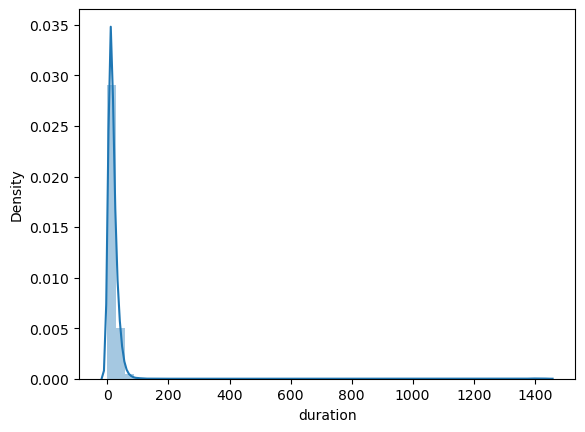

In [13]:
sns.distplot(df.duration)

In [14]:
df.duration.describe()

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
25%          8.000000
50%         13.883333
75%         23.000000
max       1439.600000
Name: duration, dtype: float64

In [15]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9658903787344154

In [16]:
df.trip_type.unique()

array([ 1.,  2., nan])

/tmp/ipykernel_273/899120127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trip_distance)


<Axes: xlabel='trip_distance', ylabel='Density'>

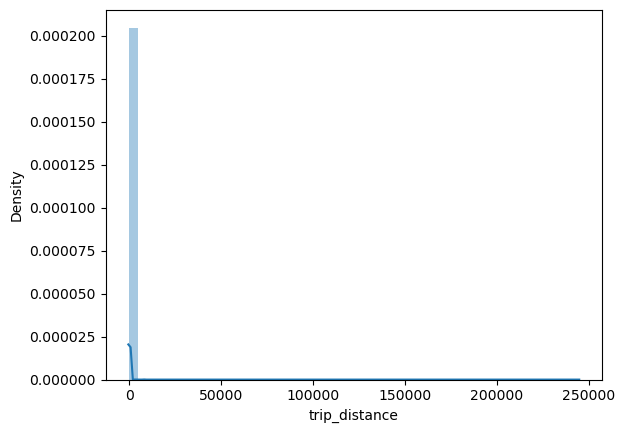

In [17]:
sns.distplot(df.trip_distance)

In [18]:
df.trip_distance.describe(percentiles=[0.999])

count     76518.000000
mean         40.862552
std        1924.408778
min           0.000000
50%           2.590000
99.9%        46.112530
max      244152.010000
Name: trip_distance, dtype: float64

In [19]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [20]:
df.trip_distance.describe(percentiles=[0.999])

count     73908.00000
mean         42.04772
std        1958.08235
min           0.00000
50%           2.60000
99.9%        39.82765
max      244152.01000
Name: trip_distance, dtype: float64

/tmp/ipykernel_273/899120127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trip_distance)


<Axes: xlabel='trip_distance', ylabel='Density'>

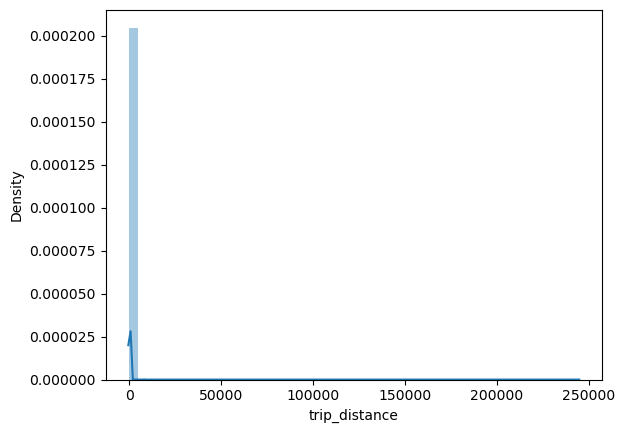

In [21]:
sns.distplot(df.trip_distance)

In [22]:
df = df[(df.trip_distance >= 0) & (df.trip_distance <= 40)]

/tmp/ipykernel_273/899120127.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.trip_distance)


<Axes: xlabel='trip_distance', ylabel='Density'>

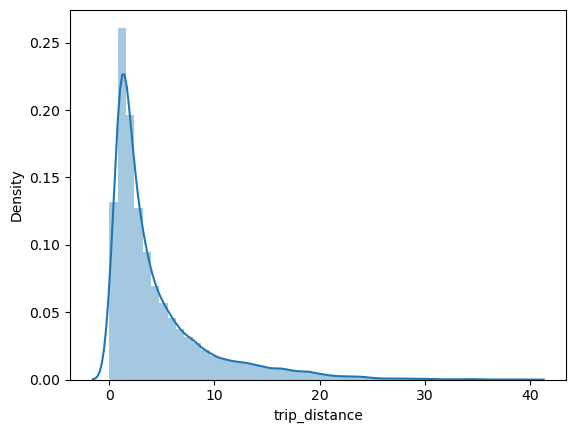

In [23]:
sns.distplot(df.trip_distance)

/tmp/ipykernel_273/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

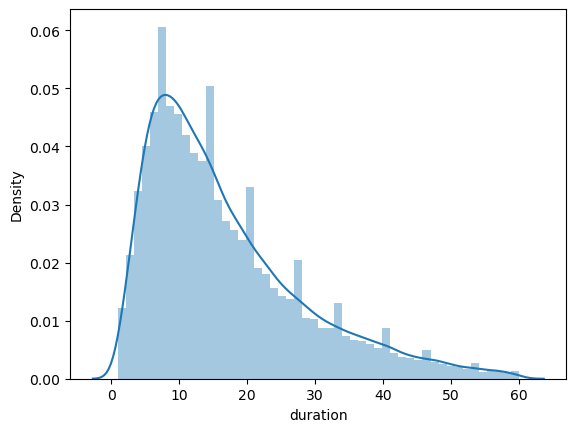

In [24]:
sns.distplot(df.duration)

In [25]:
df.count()

VendorID                 73834
lpep_pickup_datetime     73834
lpep_dropoff_datetime    73834
store_and_fwd_flag       38173
RatecodeID               38173
PULocationID             73834
DOLocationID             73834
passenger_count          38173
trip_distance            73834
fare_amount              73834
extra                    73834
mta_tax                  73834
tip_amount               73834
tolls_amount             73834
ehail_fee                    0
improvement_surcharge    73834
total_amount             73834
payment_type             38173
trip_type                38173
congestion_surcharge     38173
duration                 73834
dtype: int64

In [26]:
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)

In [27]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [28]:
len(df)

73834

In [29]:
df_start = pd.read_parquet("./data/green/green_tripdata_2021-01.parquet")

In [30]:
len(df_start)

76518

In [35]:
df_start.trip_distance.describe(percentiles=[0.999])

count     76518.000000
mean         40.862552
std        1924.408778
min           0.000000
50%           2.590000
99.9%        46.112530
max      244152.010000
Name: trip_distance, dtype: float64

In [36]:
df.trip_distance.describe(percentiles=[0.999])

count    73834.000000
mean         4.452901
std          4.862029
min          0.000000
50%          2.600000
99.9%       31.605030
max         39.730000
Name: trip_distance, dtype: float64

In [46]:
df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.total_seconds() / 60

In [48]:
df.duration.describe()

count    73834.000000
mean        16.847290
std         11.561556
min          1.000000
25%          8.050000
50%         13.983333
75%         22.616667
max         60.000000
Name: duration, dtype: float64

In [53]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)

In [54]:
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [55]:
dv = DictVectorizer()

In [56]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [57]:
X_train = dv.fit_transform(train_dicts)

In [58]:
X_train

<73834x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221502 stored elements in Compressed Sparse Row format>

In [59]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [60]:
target = 'duration'
y_train = df[target].values

In [61]:
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_273/1223447066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label ='prediction')
/tmp/ipykernel_273/1223447066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label ='actual')


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

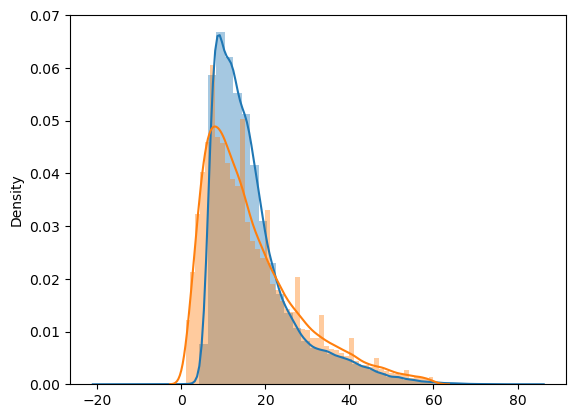

In [67]:
sns.distplot(y_pred, label ='prediction')
sns.distplot(y_train, label ='actual')
plt.legend

In [69]:
mean_squared_error(y_train, y_pred, squared=False)d

6.3665441129018046

In [83]:
df.duration.quantile(0.9999)

1.0

In [84]:
df.trip_distance.quantile(0.0)

0.0

In [183]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= df.duration.quantile(0)) & (df.duration <= df.duration.quantile(0.99))]
    print(df.duration.quantile(0.99))
    df = df[(df.trip_distance >= df.trip_distance.quantile(0)) & (df.trip_distance <= df.trip_distance.quantile(0.99))]
    print(df.trip_distance.quantile(0.99))

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [184]:
df_train = read_dataframe("./data/green/green_tripdata_2021-01.parquet")
df_val = read_dataframe("./data/green/green_tripdata_2021-02.parquet")

56.0
20.12
63.0
19.971500000000013


In [167]:
len(df_train), len(df_val)

(74994, 63286)

In [168]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [169]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [186]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.76345511833844

In [187]:
with open("models/lin_reg.bin", 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [172]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [176]:
lr = Lasso(alpha=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.780887747056652

In [180]:
lr = Ridge()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.760659051432994